<a href="https://colab.research.google.com/github/tejaspradhan/Neural-Algorithmic-Reasoning/blob/main/MNIST_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPool3D, Dense, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow import random
from tensorflow import keras
%matplotlib inline

In [2]:
data = np.load("/content/train_image_data.npy", allow_pickle=True)

In [3]:
x, y= data["x"], data["y"]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [6]:
X_train.shape

(14000, 3, 28, 28)

In [7]:
#np.array([X_train]).shape

In [8]:
X_train = X_train.reshape(X_train.shape[0], 3, 28, 28, 1)

In [9]:
X_train.shape

(14000, 3, 28, 28, 1)

In [10]:
X_test = X_test.reshape(X_test.shape[0], 3, 28, 28, 1)

In [11]:
X_test.shape

(6000, 3, 28, 28, 1)

In [19]:
random.set_seed(42)
# add batch norm layer 
# Only last layer should be FC. Replace others with convolution layers 
# add lstm after a couple more conv3d layers reducing dimensionality 
# switch to SGD. 
model = Sequential()
model.add(Conv3D(256, 5, data_format= "channels_last", input_shape=(3,28,28,1), padding='same', activation='relu'))
model.add(MaxPool3D(pool_size=(3,3,3)))
model.add(Conv3D(128, 3,padding='same', activation='relu'))
model.add(Dropout(0.3))
#model.add(MaxPool3D(pool_size=(3,3,3)))
model.add(Conv3D(64, 3,padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv3D(32, 3,padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_7 (Conv3D)           (None, 3, 28, 28, 256)    32256     
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 1, 9, 9, 256)     0         
 3D)                                                             
                                                                 
 conv3d_8 (Conv3D)           (None, 1, 9, 9, 128)      884864    
                                                                 
 dropout_1 (Dropout)         (None, 1, 9, 9, 128)      0         
                                                                 
 conv3d_9 (Conv3D)           (None, 1, 9, 9, 64)       221248    
                                                                 
 dropout_2 (Dropout)         (None, 1, 9, 9, 64)       0         
                                                      

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=optimizer, loss="mean_squared_error")

In [21]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
438/438 [==============================] - 25s 55ms/step - loss: 0.6824 - val_loss: 0.6619
Epoch 2/50
438/438 [==============================] - 24s 55ms/step - loss: 0.6584 - val_loss: 0.6539
Epoch 3/50
438/438 [==============================] - 24s 55ms/step - loss: 0.6551 - val_loss: 0.6764
Epoch 4/50
438/438 [==============================] - 24s 55ms/step - loss: 0.6510 - val_loss: 0.6531
Epoch 5/50
438/438 [==============================] - 24s 55ms/step - loss: 0.6483 - val_loss: 0.6625
Epoch 6/50
438/438 [==============================] - 22s 50ms/step - loss: 0.6469 - val_loss: 0.6480
Epoch 7/50
438/438 [==============================] - 22s 50ms/step - loss: 0.6440 - val_loss: 0.6427
Epoch 8/50
438/438 [==============================] - 22s 50ms/step - loss: 0.5770 - val_loss: 0.5086
Epoch 9/50
438/438 [==============================] - 22s 50ms/step - loss: 0.5077 - val_loss: 0.4902
Epoch 10/50
438/438 [==============================] - 24s 55ms/step - loss: 0.482

In [24]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
438/438 [==============================] - 24s 55ms/step - loss: 0.1107 - val_loss: 0.3142
Epoch 2/10
438/438 [==============================] - 22s 50ms/step - loss: 0.1068 - val_loss: 0.3158
Epoch 3/10
438/438 [==============================] - 22s 50ms/step - loss: 0.1071 - val_loss: 0.3126
Epoch 4/10
438/438 [==============================] - 22s 50ms/step - loss: 0.1031 - val_loss: 0.3030
Epoch 5/10
438/438 [==============================] - 22s 50ms/step - loss: 0.1006 - val_loss: 0.3139
Epoch 6/10
438/438 [==============================] - 22s 50ms/step - loss: 0.1002 - val_loss: 0.2979
Epoch 7/10
438/438 [==============================] - 24s 55ms/step - loss: 0.0985 - val_loss: 0.3063
Epoch 8/10
438/438 [==============================] - 22s 50ms/step - loss: 0.0940 - val_loss: 0.3096
Epoch 9/10
438/438 [==============================] - 22s 50ms/step - loss: 0.0933 - val_loss: 0.3178
Epoch 10/10
438/438 [==============================] - 24s 55ms/step - loss: 0.093

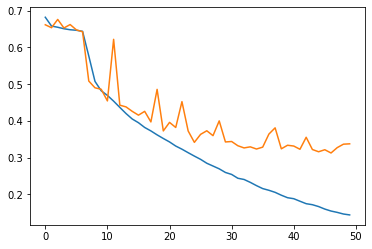

In [22]:
plt.plot(range(50), history.history['loss'])
plt.plot(range(50), history.history['val_loss'])
plt.show()